In [25]:
from math import sqrt

import numpy as np

from lab1.src import (
    compute_pareto_mean,
    compute_pareto_variance,
    compute_theta,
    compute_g,
    plot_samples_with_pareto_baseline,
    seed_everything
)

seed_everything(42)

In [26]:
N = 6
S = 8
I1 = 5
I2 = 4

alpha_1 = 0.1
alpha_2 = 0.01

tau = 1 / (1 + I1)
p1 = (alpha_1 ** (1 - tau)) * (alpha_2 ** tau)
p2 = 5 * p1 / np.sqrt(S)

N1 = 10 * (2 + N)
N2 = 100 * (2 + N)
l = int((I2 + 2.5) / 2)

thetas = {
    1: (0, 1),
    2: (S, N),
    3: (N, S + 2),
    4: (S, S + N),
    5: (-N, S + 4),
}

print(f"""
N = {N}
S = {S}
I1 = {I1}
I2 = {I2}
alpha_1 = {alpha_1}
alpha_2 = {alpha_2}
tau = {tau}
p1 = {p1}
p2 = {p2}
N1 = {N1}
N2 = {N2}
l = {l}
thetas = {thetas}
""")


N = 6
S = 8
I1 = 5
I2 = 4
alpha_1 = 0.1
alpha_2 = 0.01
tau = 0.16666666666666666
p1 = 0.06812920690579613
p2 = 0.12043656049987451
N1 = 80
N2 = 800
l = 3
thetas = {1: (0, 1), 2: (8, 6), 3: (6, 10), 4: (8, 14), 5: (-6, 12)}



In [27]:
theta_0 = thetas[l]
mu_0 = compute_pareto_mean(*theta_0)
v0 = compute_pareto_variance(*theta_0)
theta_1 = compute_theta(mu_0, N * v0)
theta_2 = compute_theta(mu_0 + 2 * sqrt(v0), v0 / S)

print(f"""
theta_0 = {theta_0}
mu_0 = {mu_0:.4f}
v0 = {v0:.4f}
theta_1 = {theta_1}
theta_2 = {theta_2}
""")


theta_0 = (6, 10)
mu_0 = 6.6667
v0 = 0.5556
theta_1 = (5.273697218066576, 4.785938897200182)
theta_2 = (7.902231125466136, 31.971223758837382)



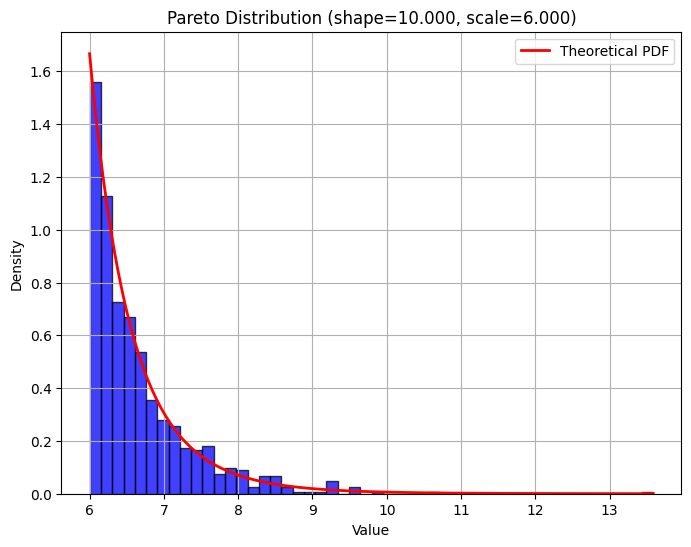

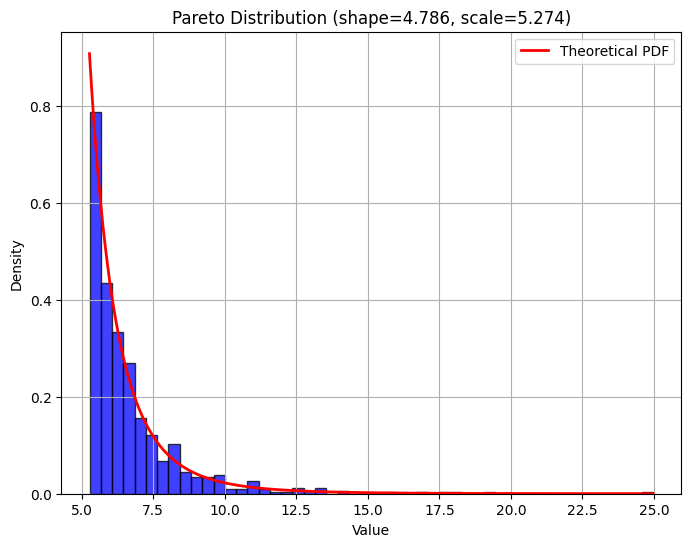

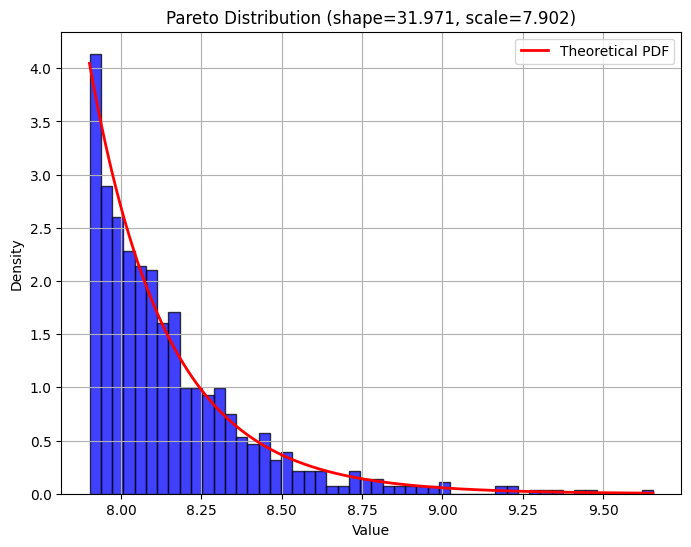

In [28]:
G0 = compute_g(*theta_0, num_samples=N2)
plot_samples_with_pareto_baseline(G0, *theta_0)

G1 = compute_g(*theta_1, num_samples=N2)
plot_samples_with_pareto_baseline(G1, *theta_1)

G2 = compute_g(*theta_2, num_samples=N2)
plot_samples_with_pareto_baseline(G2, *theta_2)

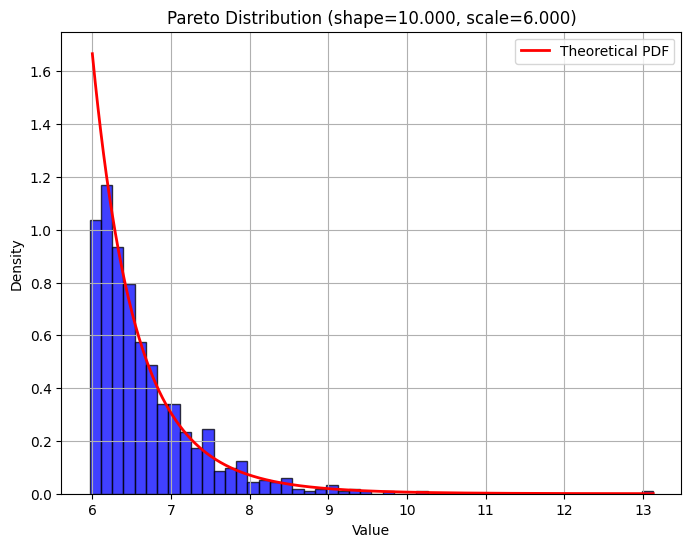

In [29]:
FY1 = (1 - p1) * G0 + p1 * G1
plot_samples_with_pareto_baseline(FY1, *theta_0)

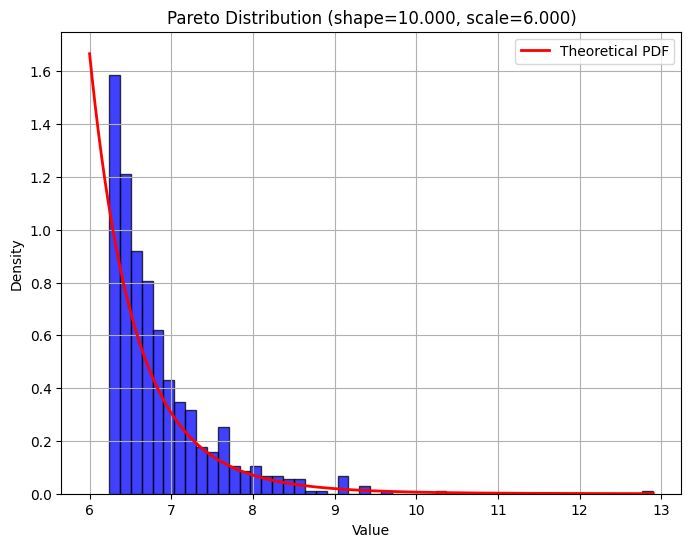

In [30]:
FY2 = (1 - p2) * G0 + p2 * G2
plot_samples_with_pareto_baseline(FY2, *theta_0)